# Kazakh Layouts Development

I decided to develop a Kazakh layout with the same method used for Russian.

In [2]:
from lib import Corpus, Keyboard, Layout, Result, STANDARD_KBD, std_key_shape, STD_EXTRA_KEYS, ERGODOX, compare
import pandas as pd

Text source: [qazcorpora.kz](https://qazcorpora.kz/).

## Position Penalties

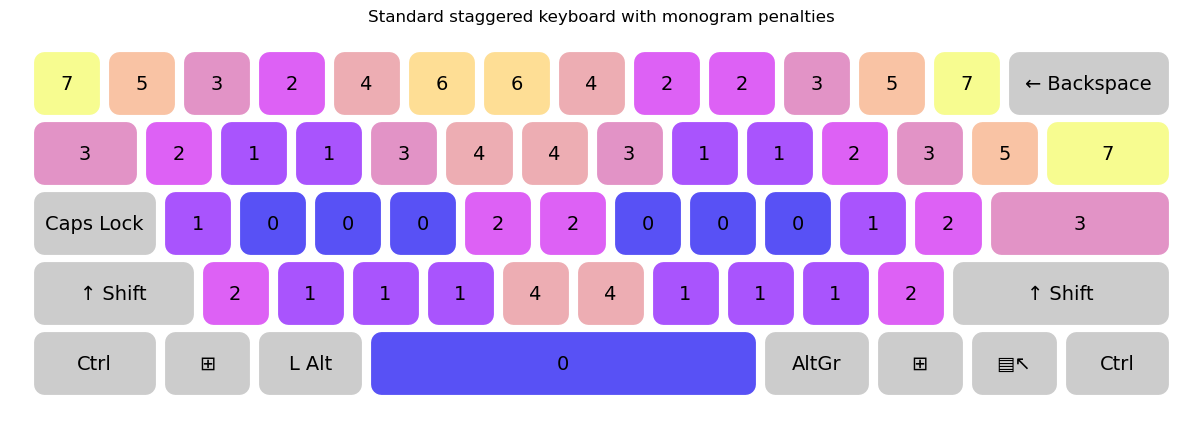

In [2]:
_ = STANDARD_KBD.display()

In [32]:
KZ_LETTERS = {
#     'vh': 'аоыұия',
#     'vs': 'әеөіү',
#     'vf': 'эю',
    'v': 'аоыұияәеөіүэю',
    'c': 'бвгғджзкқлмнңпрстуфхһцчшщъьй'
}
KZ = Corpus.from_path('kazak.txt', types=KZ_LETTERS)

In [33]:
# Analyzing Where Keys Gravitate to

## Inner (index finger) or outer (pinky)


In [34]:
KZ.bigrams

,bigram,num,l1,l2,t1,t2,freq
0,¶қ,88,¶,қ,-,c,0.000285
1,қа,2726,қ,а,c,v,0.008842
2,аз,1290,а,з,v,c,0.004184
3,за,895,з,а,c,v,0.002903
4,ақ,1762,а,қ,v,c,0.005715
...,...,...,...,...,...,...,...
1833,пя,1,п,я,c,v,0.000003
1834,о:,1,о,:,v,-,0.000003
1835,эй,1,э,й,v,c,0.000003
1836,"""щ",1,"""",щ,-,c,0.000003


,freq_out,freq_in,outer,frequency,outerness
ү,0.129745,0.000000,-0.129745,0.129745,-10000.000000
и,36.004126,1.167701,-34.836424,37.171827,-9371.727749
а,9.146994,3.730157,-5.416837,12.877151,-4206.549118
ұ,0.454106,0.324361,-0.129745,0.778468,-1666.666667
о,4.930295,5.806071,0.875776,10.736365,815.709970
е,6.681847,14.401650,7.719804,21.083497,3661.538462
ы,0.421670,1.848861,1.427191,2.270530,6285.714286
ю,0.097308,0.940648,0.843340,1.037957,8125.000000
і,0.291925,2.984126,2.692200,3.276051,8217.821782
я,0.097308,24.391984,24.294676,24.489293,9920.529801


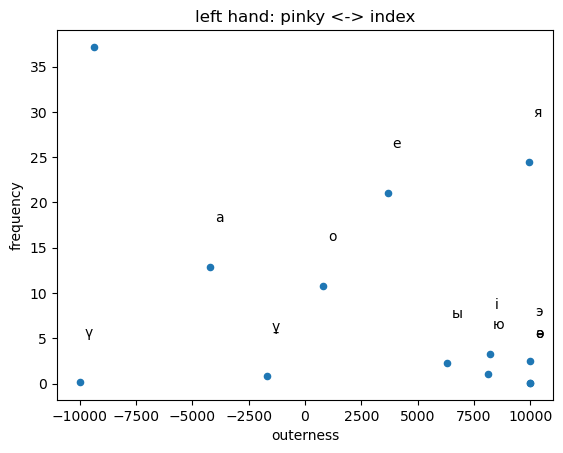

In [35]:
KZ.display_outerness("(t1 == 'v') & (t2 == 'v')", True)

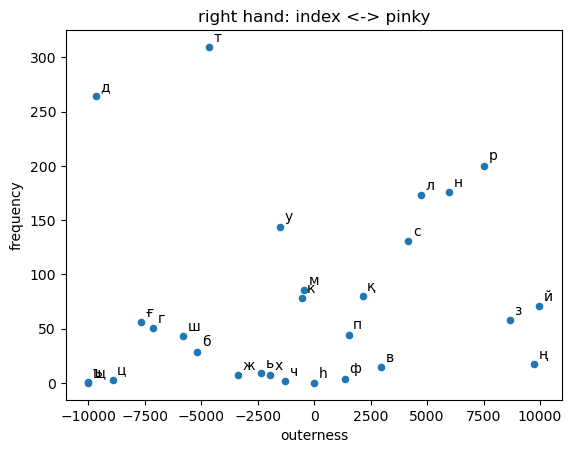

In [66]:
_ = KZ.display_outerness("(t1 == 'c') & (t2 == 'c')")

In [184]:
layouts = {
    'default': r'''
    
`12345 67890-=
→йцуке нгщшзхъ\
 фывап ролджэ¶
 ячсми тьбю.
⌴

~!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅∅ ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅,
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ұ∅үқё ңғ∅∅∅һ∅|
 ∅∅∅ә∅ ∅ө∅∅∅∅∅
 ∅∅∅∅і ∅∅∅∅/
∅
''',

    'тест1': r'''
`12345 67890-=
→уеэюя нгцшзчф\
 ыаоий рлмсдж¶
 ъьхщв кптб.
⌴

~!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅∅ ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅,
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ұ∅үқё ңғ∅∅∅һ∅|
 ∅∅∅ә∅ ∅ө∅∅∅∅∅
 ∅∅∅∅і ∅∅∅∅/
∅
''',

    'тест2': r'''
`12345 67890-=
→уеэюя шнбцзчф\
 ыаоий грлмсж¶
 ъьхщв дкпт.
⌴

~!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅∅ ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅,
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ұ∅∅үё ∅ң∅∅∅∅∅|
 ∅ә∅і∅ ғ∅ө∅∅∅∅
 ∅∅һ∅∅ ∅қ∅∅/
∅
''',

    'тест3': r'''
`12345 67890-=
→июяйв цдбнзчф\
 оеаы, грлмсж¶
 ъьхщэ шткпу
⌴

~!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅. ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅∅ү∅ұ∅ ∅∅∅ң∅∅∅|
 ө∅әі∅ ғ∅∅∅∅∅∅
 ∅∅һ∅∅ ∅∅қ∅/
∅
''',
    
  'тест4': r'''
`12345 67890-=
→юиявч бгмдзхъ\
 уоаеы ,лнрйж¶
 цьщэф шткпс
⌴

~!"№;% :?*()_+
 ∅∅∅∅∅ ∅∅∅∅∅∅∅/
 ∅∅∅∅∅ .∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅∅∅∅
∅

∅∅∅∅∅∅ ∅∅∅∅∅∅∅
∅ү∅∅∅∅ ∅ғң∅∅һ∅|
 ұөә∅і ∅∅∅∅∅∅∅
 ∅∅∅∅∅ ∅∅қ∅/
∅
''',
}


In [185]:
# these keys MUST be in any layout, otherwise the code throws an exception and halts
KZ_BASE = set('`-!?%*():;.,⌴¶')
for v in KZ_LETTERS.values():
    KZ_BASE |= set(v)

res = {}
for k, l in layouts.items():
    print(k, end=': ')
    res[k] = r = Result(KZ, Layout(k, l, base_keys=KZ_BASE))
    print(r.score)

default: key "/" repeated: 2
2.59039773433361
тест1: key "/" repeated: 2
1.699491794808066
тест2: key "/" repeated: 2
1.440209037811251
тест3: key "/" repeated: 2
1.1166745154981719
тест4: key "/" repeated: 2
1.1798232704772744


# Standings

In [186]:
comments = {
    'default': 'ЙЦУКЕН',
    'тест1': 'simple dvorak-like improvement',
    'тест2': 'simple dvorak-like improvement',
    'тест3': '',
    'тест4': ''
}
print(pd.DataFrame([(k, v.score.round(3), comments[k]) for k, v in res.items() if k in comments],
        columns=['layout', 'score', 'comment']).sort_values('score', ascending=True)
    .to_markdown(index=False))

| layout   |   score | comment                        |
|:---------|--------:|:-------------------------------|
| тест3    |   1.117 |                                |
| тест4    |   1.18  |                                |
| тест2    |   1.44  | simple dvorak-like improvement |
| тест1    |   1.699 | simple dvorak-like improvement |
| default  |   2.59  | ЙЦУКЕН                         |


Dvorak layout is still the best, if we weigh bigrams seriously. Colemak was a mix of both, and scores slightly worse, but not as badly as I expected.
    

## Heatmap

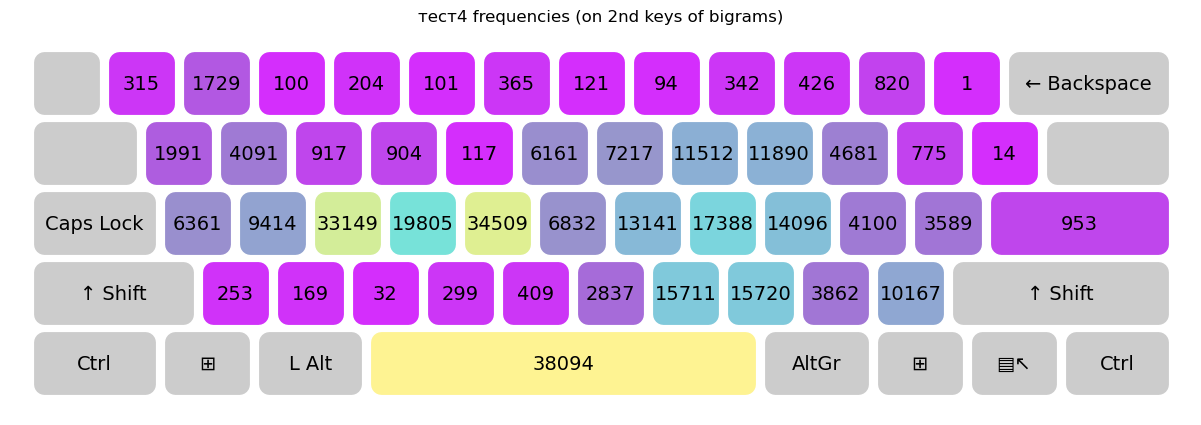

In [187]:
res['тест4'].display('freq')

## Arrow Maps

The less arrows, the better.

Look at the arrow maps: almost all arrows are thin, and there are few of them. QWERTY has lots of thick arrows. Colemak has noteably more than Dvorak, but the score is quite ok.

I expected Colemak to have a lot of costs on the left hand, but it has more on the right.

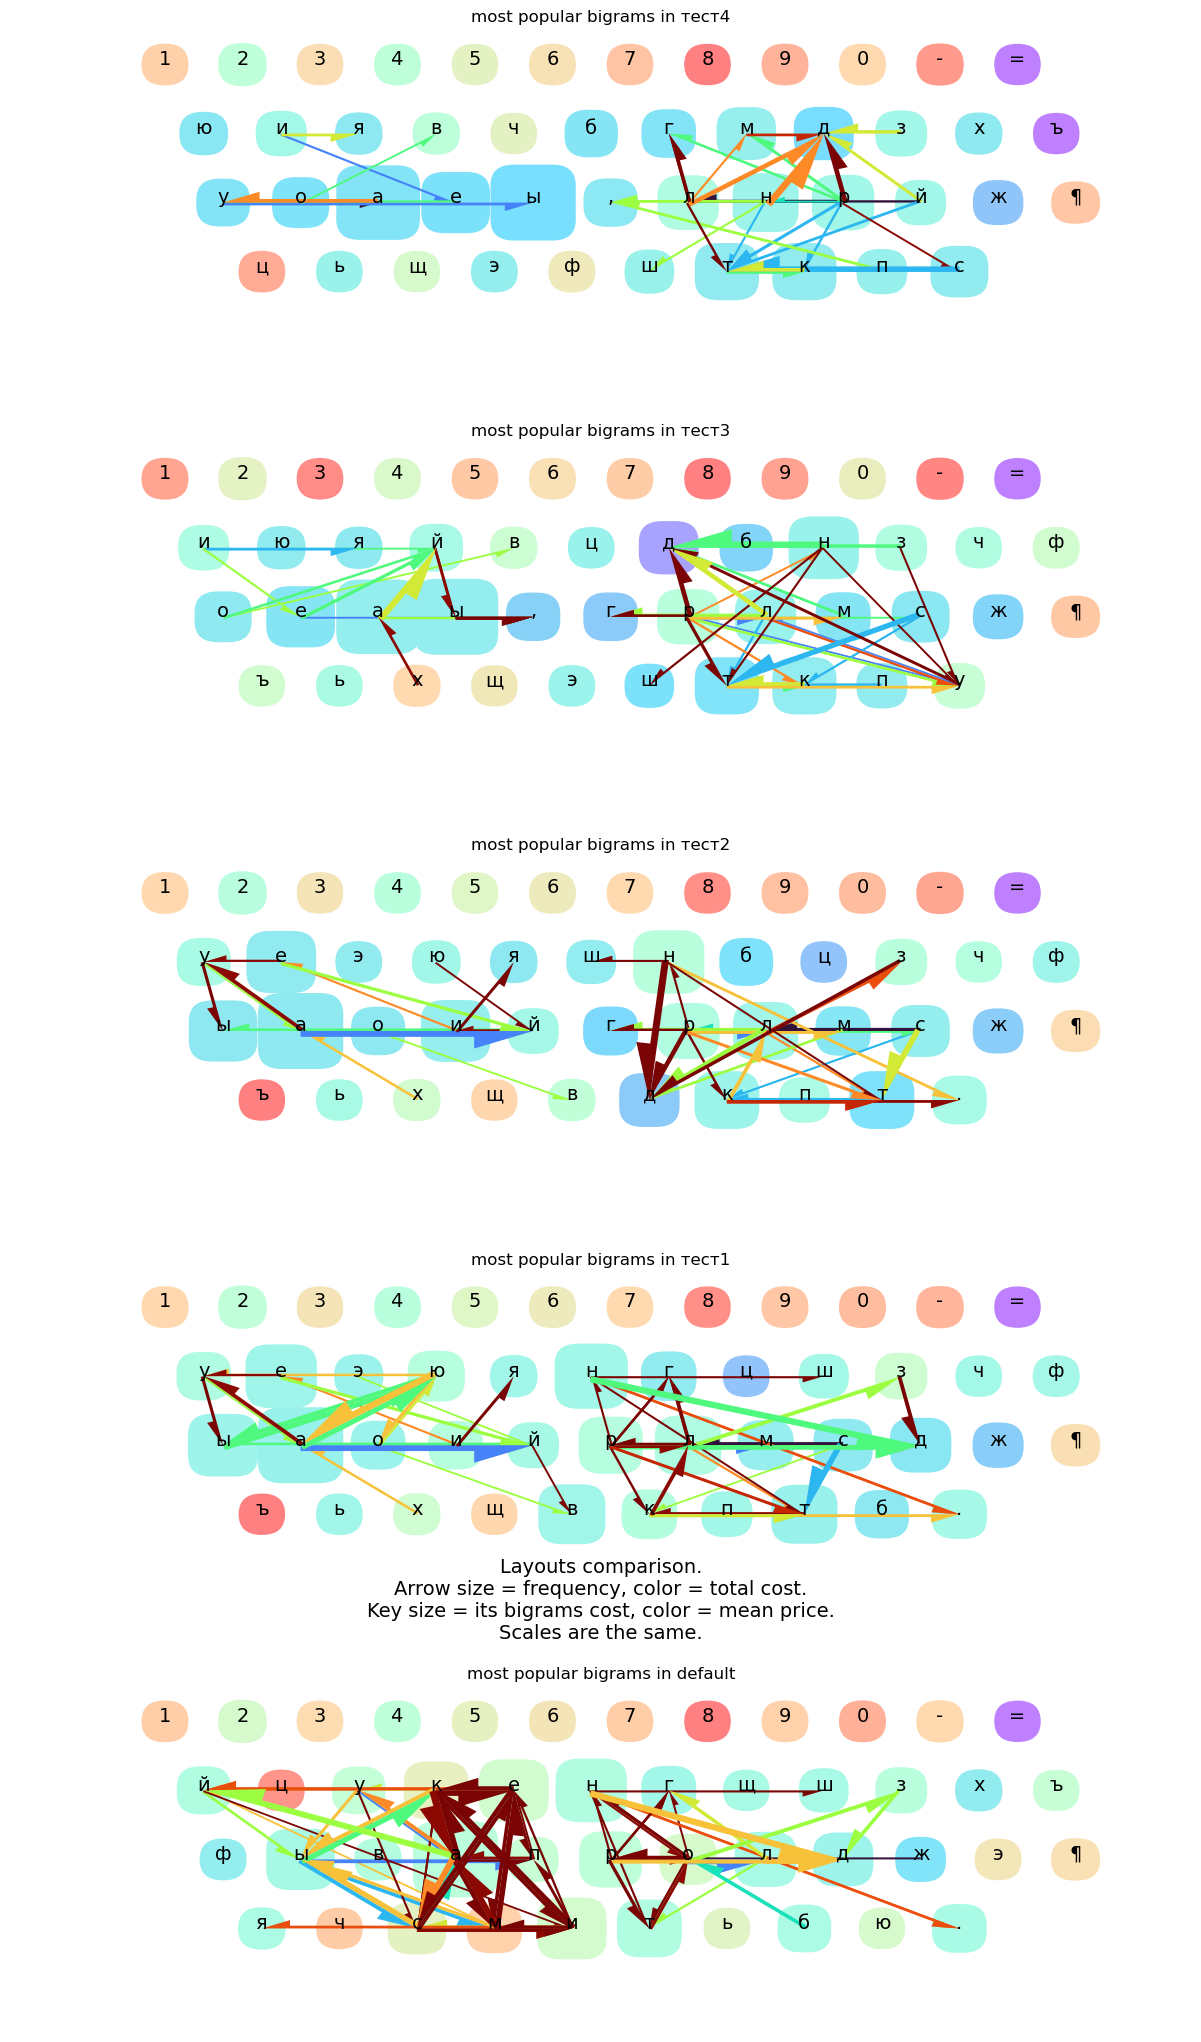

In [188]:
res['тест4'].combomap(res['тест3'], res['тест2'], res['тест1'], res['default'])

<AxesSubplot: xlabel='finger'>

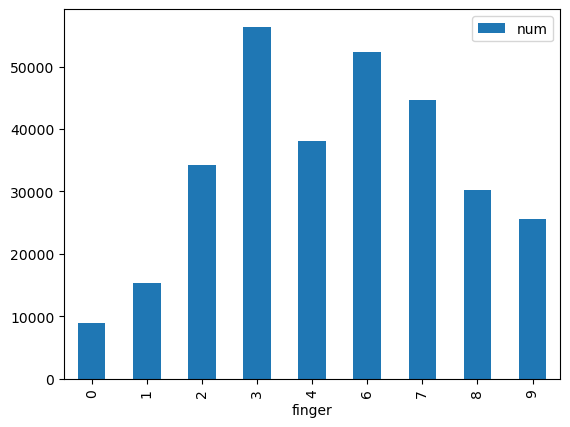

In [189]:
res['тест4'].bigrams.groupby('finger').agg({'num': 'sum'}).plot.bar()

# Gravitation to Rows

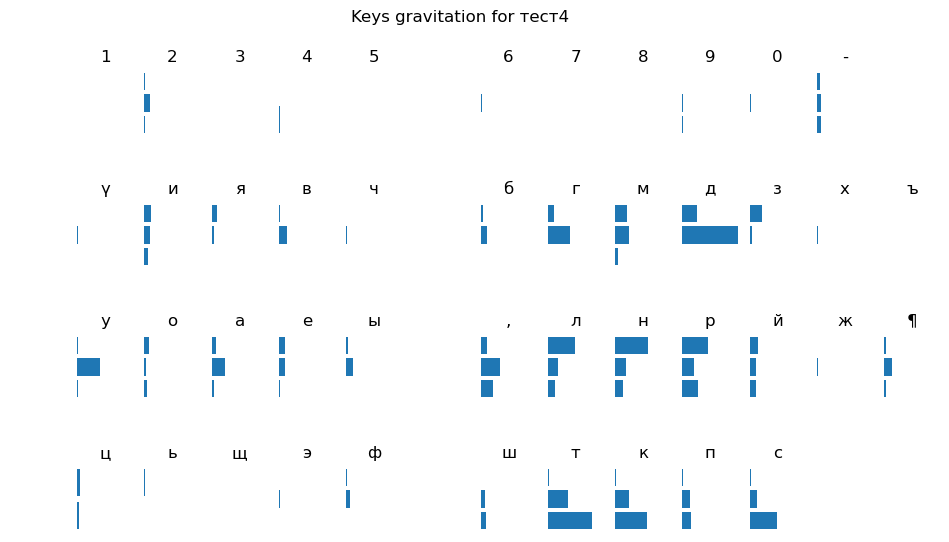

In [190]:
res['тест4'].display('rows')

# Kazakh Layout Development